In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats
%matplotlib inline

In [156]:
file=pd.read_csv('datacopy.csv')
file.head() 

,id,date,Comment,Source,Number of Ups,Attitude,Reason for support,Reason for against-Axial,Reason for against,Actions,Perspective,Context,count of words,URL
0,Extremely-Bad-Idea,9/4/21,Eventually cameras will be everywhere. Making ...,hospital surveillance,57,Support,protect doctors,NaN,NaN,NaN,analyst,Hospital Operation Room,36,NaN
1,ashlil,9/4/21,I think this is only going to be good for ever...,hospital surveillance,49,Support,NaN,NaN,NaN,NaN,administer,Hospital Operation Room,15,NaN
2,Thorm_Haugr,9/5/21,Can also be used as educational material.,hospital surveillance,23,Support,educational,NaN,NaN,NaN,administer,Hospital Operation Room,7,NaN
3,Fresh-NeverFrozen,9/5/21,"Probably an unpopular opinion/though on here, ...",hospital surveillance,18,Against,NaN,increase risk of liability and security,liability,NaN,employee,Hospital Operation Room,196,NaN
4,Nopain59,9/5/21,"In the litigious environment of the US, this w...",hospital surveillance,5,Against,NaN,increase risk of liability and security,liability,NaN,administer,Hospital Operation Room,63,NaN


In [157]:
pd.options.display.float_format = '{:,.0f}'.format
display(file)
#convert float to integer

,id,date,Comment,Source,Number of Ups,Attitude,Reason for support,Reason for against-Axial,Reason for against,Actions,Perspective,Context,count of words,URL
0,Extremely-Bad-Idea,9/4/21,Eventually cameras will be everywhere. Making ...,hospital surveillance,57,Support,protect doctors,NaN,NaN,NaN,analyst,Hospital Operation Room,36,NaN
1,ashlil,9/4/21,I think this is only going to be good for ever...,hospital surveillance,49,Support,NaN,NaN,NaN,NaN,administer,Hospital Operation Room,15,NaN
2,Thorm_Haugr,9/5/21,Can also be used as educational material.,hospital surveillance,23,Support,educational,NaN,NaN,NaN,administer,Hospital Operation Room,7,NaN
3,Fresh-NeverFrozen,9/5/21,"Probably an unpopular opinion/though on here, ...",hospital surveillance,18,Against,NaN,increase risk of liability and security,liability,NaN,employee,Hospital Operation Room,196,NaN
4,Nopain59,9/5/21,"In the litigious environment of the US, this w...",hospital surveillance,5,Against,NaN,increase risk of liability and security,liability,NaN,administer,Hospital Operation Room,63,NaN
5,FractureFixer,9/5/21,The most egregious outliers will be stopped. T...,hospital surveillance,8,Support,Prevent wrongdoing,NaN,NaN,NaN,analyst,Hospital Operation Room,35,NaN
6,getmeoutofkorea1,9/5/21,there is a major problem with ghost surgeons h...,hospital surveillance,6,Wishy-Washy,Prevent wrongdoing,NaN,NaN,NaN,patient,Hospital Operation Room,51,NaN
7,moolah_dollar_cash,9/6/21,I think the added stress of the cameras can't ...,hospital surveillance,1,Against,NaN,causing stress,stress of being monitored,NaN,patient,Hospital Operation Room,81,NaN
8,Balthasar_Loscha,9/5/21,I’ve met an investigator for medical malpracti...,hospital surveillance,4,Support,Prevent wrongdoing,NaN,NaN,NaN,patient,Hospital Operation Room,48,NaN
9,jc1890,NaN,I’ve met an investigator for medical malpracti...,hospital surveillance,26,Against,NaN,violates privacy,privacy,NaN,patient,Hospital Operation Room,48,NaN


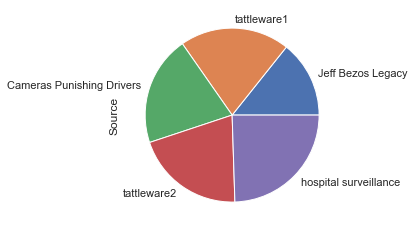

In [95]:
file.Source.value_counts().sort_values().plot(kind='pie')
plt.savefig('surveillancepie.png')

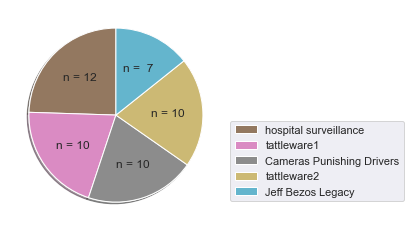

In [115]:
#add absolute values to pie chart
actual_values=file.Source.value_counts(dropna=True)
plt.pie(actual_values, autopct= lambda x: 'n ={:3.0f}'.format(x*values.sum()/100), startangle=90)
labels=['hospital surveillance','tattleware1','Cameras Punishing Drivers','tattleware2','Jeff Bezos Legacy']
patches, texts = plt.pie(sizes, shadow=True, startangle=90)
plt.legend(patches, labels,bbox_to_anchor=(1, 0., 0.5, 0.5))
plt.savefig('sourcepie.png')

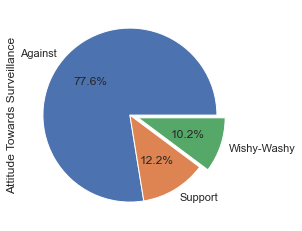

In [68]:
file.Attitude.value_counts().plot(kind='pie',label="Attitude Towards Surveillance",autopct='%1.1f%%',explode=(0, 0, 0.1), \
                   shadow=False, startangle=0)
plt.savefig('attitude.png')

In [50]:
file.Attitude.value_counts()

Against        38
Support         6
Wishy-Washy     5
Name: Attitude, dtype: int64

In [116]:
file['Reason for support'].value_counts()

Prevent wrongdoing    4
protect doctors       1
educational           1
Name: Reason for support, dtype: int64

In [117]:
contigency= pd.crosstab(file['Attitude'], file['Source'])
contigency

Source,Cameras Punishing Drivers,Jeff Bezos Legacy,hospital surveillance,tattleware1,tattleware2
Attitude,,,,,
Against,7,7,5,9,10
Support,0,0,6,0,0
Wishy-Washy,3,0,1,1,0


In [7]:
file['Reason for against'].unique()

array([nan, 'liability', 'stress of being monitored', 'privacy',
       'unreasonable workload', 'Capitalism-driven',
       'violation of human rights', 'excessive monitoring', 'security',
       'bad management', 'Tech companies become dangerously big'],
      dtype=object)

In [188]:
file['Reason for against-Axial'].value_counts()

bad management                             11
excessive monitoring                        8
increase risk of liability and security     4
violates privacy                            4
profit driven                               4
causing stress                              3
Name: Reason for against-Axial, dtype: int64

<AxesSubplot:>

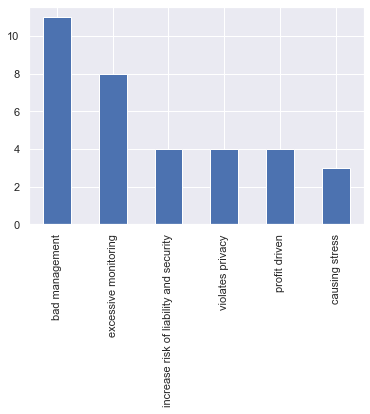

In [118]:
file['Reason for against-Axial'].value_counts().plot(kind='bar')

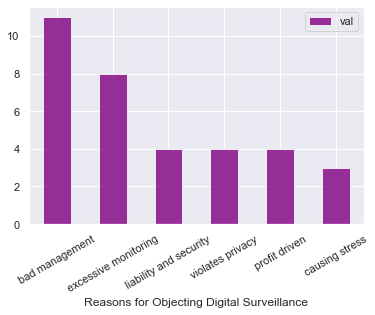

In [147]:

df = pd.DataFrame({'Reasons for Objecting Digital Surveillance':['bad management', 'excessive monitoring', 'liability and security','violates privacy','profit driven','causing stress'], 'val':[11, 8, 4,4,4,3]})
ax = df.plot.bar(x='Reasons for Objecting Digital Surveillance', y='val', rot=0,color='purple',alpha=0.8)
plt.xticks(rotation=30, horizontalalignment="center")

plt.savefig('Objection.png')

In [162]:
file.Perspective.value_counts()

employee      30
administer     7
analyst        6
patient        6
Name: Perspective, dtype: int64

In [163]:
contigency= pd.crosstab(file['Attitude'], file['Perspective'])
contigency

Perspective,administer,analyst,employee,patient
Attitude,,,,
Against,5,4,26,3
Support,2,2,0,2
Wishy-Washy,0,0,4,1


In [159]:
# create a list of our conditions
conditions = [
    (file['Perspective'] == 'employee'),
    (file['Perspective'] == 'patient'),
   (file['Perspective'] == 'analyst'),
    (file['Perspective'] == 'administer')
    ]

# create a list of the values we want to assign for each condition
values = ['employee', 'other', 'other', 'other']

# create a new column and use np.select to assign values to it using our lists as arguments
file['Perspective_recoded'] = np.select(conditions, values)

# display updated DataFrame
file.head()

,id,date,Comment,Source,Number of Ups,Attitude,Reason for support,Reason for against-Axial,Reason for against,Actions,Perspective,Context,count of words,URL,Perspective_recoded
0,Extremely-Bad-Idea,9/4/21,Eventually cameras will be everywhere. Making ...,hospital surveillance,57,Support,protect doctors,NaN,NaN,NaN,analyst,Hospital Operation Room,36,NaN,other
1,ashlil,9/4/21,I think this is only going to be good for ever...,hospital surveillance,49,Support,NaN,NaN,NaN,NaN,administer,Hospital Operation Room,15,NaN,other
2,Thorm_Haugr,9/5/21,Can also be used as educational material.,hospital surveillance,23,Support,educational,NaN,NaN,NaN,administer,Hospital Operation Room,7,NaN,other
3,Fresh-NeverFrozen,9/5/21,"Probably an unpopular opinion/though on here, ...",hospital surveillance,18,Against,NaN,increase risk of liability and security,liability,NaN,employee,Hospital Operation Room,196,NaN,employee
4,Nopain59,9/5/21,"In the litigious environment of the US, this w...",hospital surveillance,5,Against,NaN,increase risk of liability and security,liability,NaN,administer,Hospital Operation Room,63,NaN,other


<AxesSubplot:>

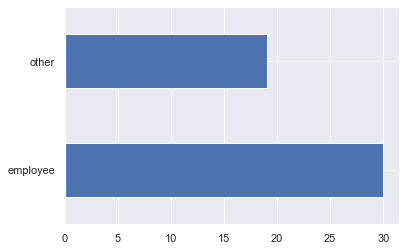

In [160]:
file.Perspective_recoded.value_counts().plot(kind='barh')

In [161]:
contigency= pd.crosstab(file['Attitude'], file['Perspective_recoded'])
contigency

Perspective_recoded,employee,other
Attitude,,
Against,26,12
Support,0,6
Wishy-Washy,4,1


In [155]:
file['Perspective_recoded'].value_counts()

employee    30
other       18
0            1
Name: Perspective_recoded, dtype: int64

In [164]:
file['count of words'].describe()

count    49
mean     52
std      46
min       7
25%      21
50%      36
75%      69
max     212
Name: count of words, dtype: float64

In [11]:
file['Number of Ups'].describe()

count      49
mean      158
std       359
min         0
25%         5
50%        13
75%        57
max     1,800
Name: Number of Ups, dtype: float64

In [186]:

# create a list of our conditions
conditions = [
    (file['Context'] == 'Amazon Workplace'),
    (file['Context'] == 'General workplace'),
   (file['Context'] == 'Hospital Operation Room'),
    (file['Context'] == 'Surveillance on Truck Driver')
    ]

# create a list of the values we want to assign for each condition
values = ['General workplace', 'General workplace', 'Hospital Operation Room', 'Surveillance on Truck Driver']

# create a new column and use np.select to assign values to it using our lists as arguments
file['Context_recoded'] = np.select(conditions, values)

# display updated DataFrame
file.head()
contigency= pd.crosstab(file['Attitude'], file['Context_recoded'])
contigency

Context_recoded,General workplace,Hospital Operation Room,Surveillance on Truck Driver
Attitude,,,
Against,26,5,7
Support,0,6,0
Wishy-Washy,1,1,3


In [187]:
file.groupby('Context_recoded')
#file.groupby('Context').size()
file.groupby(['Context_recoded','Attitude']).size()

Context_recoded               Attitude   
General workplace             Against        26
                              Wishy-Washy     1
Hospital Operation Room       Against         5
                              Support         6
                              Wishy-Washy     1
Surveillance on Truck Driver  Against         7
                              Wishy-Washy     3
dtype: int64

In [167]:
x=file['Number of Ups'].dropna(how='any')
a=len(x)
y=file['count of words'].dropna(how='any')
b=len(y)
r, p = scipy.stats.pearsonr(x, y)
print('r=',r,'p=',p)
from decimal import *
getcontext().prec = 2
Decimal(p)

r= 0.5940691811337289 p= 6.796466167384094e-06


Decimal('0.00000679646616738409370395146424925769679248332977294921875')

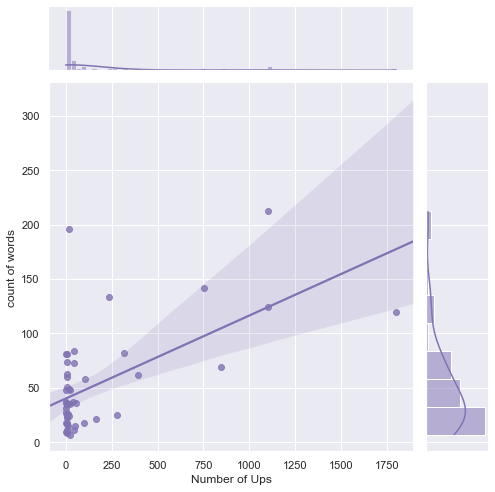

In [168]:
sns.set_theme(style="darkgrid")
g = sns.jointplot(x=file['Number of Ups'], y=file['count of words'], data=file,
                  kind="reg", truncate=False,
                  color="m", height=7)

In [179]:
from scipy import stats
import pingouin as pg
pg.homoscedasticity(data=file, dv='Number of Ups', group='Attitude')


,W,pval,equal_var
levene,1,0,True


In [183]:
pg.anova(data=file, dv='Number of Ups', between='Attitude',detailed=True)

#Decimal(p)

,Source,SS,DF,MS,F,p-unc,np2
0,Attitude,"282,879",2,"141,439",1,0,0
1,Within,"5,895,706",46,"128,168",NaN,NaN,NaN


In [22]:
pg.pairwise_tukey(data=file, dv='Number of Ups', between='Attitude')

,A,B,mean(A),mean(B),diff,se,T,p-tukey,hedges
0,Against,Support,199,24,175,157,1,1,0
1,Against,Wishy-Washy,199,8,190,170,1,1,1
2,Support,Wishy-Washy,24,8,15,217,0,1,0


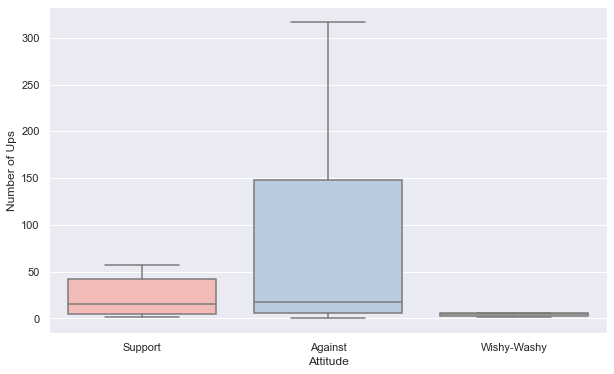

In [177]:
fig = plt.subplots(figsize=(10, 6))
sns.boxplot(
    data=file, showfliers=False,
    x=file['Attitude'],
    y=file['Number of Ups'],
    palette="Pastel1")
plt.ylabel("Number of Ups")
plt.savefig('boxplot.png')